In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_final=pd.read_csv(r"/content/drive/Shareddrives/DATA606 capstone project/final_data.csv").drop(columns=["Unnamed: 0"])

# DEEP LEARNING MODELS

In [ ]:
print(data_final.columns)


Index(['datetime', 'load', 'solar', 'wind', 'net load', 'renewables',
       'nuclear', 'large hydro', 'imports', 'generation', 'thermal',
       'load less (generation+imports)', 'wind curtailment',
       'solar curtailment', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'windgust', 'windspeed', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'hour', 'day', 'month'],
      dtype='object')


##Research question 1

###DNN

In [ ]:
features = ['solar', 'renewables', 'imports', 'temp', 'hour', 'month', 'humidity', 'wind']
target = 'load'

X = data_final[features]
y = data_final[target]

Epoch 1/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 109273776128.0000 - mae: 319459.7500 - val_loss: 107949236224.0000 - val_mae: 317704.5625 - learning_rate: 1.0000e-04
Epoch 2/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 108726820864.0000 - mae: 318509.0000 - val_loss: 101747744768.0000 - val_mae: 308340.9375 - learning_rate: 1.0000e-04
Epoch 3/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 99110576128.0000 - mae: 304033.4688 - val_loss: 83814506496.0000 - val_mae: 279308.9688 - learning_rate: 1.0000e-04
Epoch 4/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 77957038080.0000 - mae: 268427.8125 - val_loss: 55429910528.0000 - val_mae: 224218.7031 - learning_rate: 1.0000e-04
Epoch 5/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 49346535424.0000 - mae: 207678.5312 - val_loss: 28569704448.0000 - val_mae: 150834.2812 - learning_rate: 1.0000e-04
Epoch 6/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 26076358656.0000 - mae: 140332.6406 - 

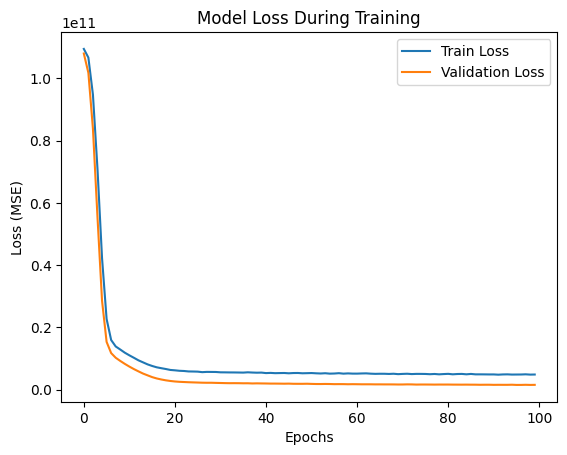

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt


# 1. Data Preprocessing
def preprocess_data(data):
    data = data[features + [target]]
    data = data.dropna()  # Drop any rows with missing values
    return data

# Assume data_cleaned is our input dataset
data_prepared = preprocess_data(data_final)

# Split data into features and target
X = data_prepared[features]
y = data_prepared[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Define the Model Architecture
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# 3. Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# 4. Train the Model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])

# 5. Evaluate the Model
# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculate performance metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Display the results
print("Neural Network Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape}")

print("\nNeural Network Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape}")

# Optional: Plotting Training History
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()


The neural network performs well with R² scores of **0.779 (train)** and **0.782 (test)**, indicating strong generalization. The MAE is consistent at **~27,600**, but further tuning could improve accuracy. The learning curve shows convergence without overfitting, but the MAPE discrepancy suggests potential outliers or scaling issues.

###LSTM

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 5.0 MB/s eta 0:00:00


Epoch 1/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 52397867008.0000 - mae: 191867.6406 - val_loss: 7304309760.0000 - val_mae: 64091.4609 - learning_rate: 0.0010
Epoch 2/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 12995243008.0000 - mae: 88901.6172 - val_loss: 6959936512.0000 - val_mae: 60561.1641 - learning_rate: 0.0010
Epoch 3/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 11635544064.0000 - mae: 83712.4219 - val_loss: 6787578880.0000 - val_mae: 59765.3125 - learning_rate: 0.0010
Epoch 4/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 10654288896.0000 - mae: 80334.7266 - val_loss: 6144053248.0000 - val_mae: 56813.1055 - learning_rate: 0.0010
Epoch 5/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 10508485632.0000 - mae: 79318.2500 - val_loss: 5869913600.0000 - val_mae: 57127.2070 - learning_rate: 0.0010
Epoch 6/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 10155553792.0000 - mae: 78282.9766 - val_loss: 5702420992.0000 - val_mae: 5561

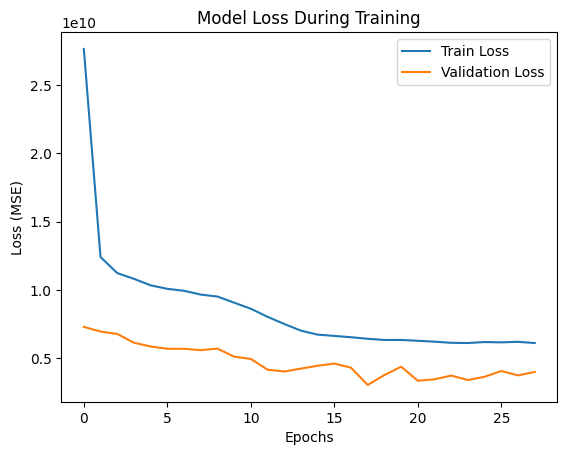

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU, PReLU

# Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

# Reshape the input data to fit LSTM requirements (samples, timesteps, features)
X_train_scaled = np.expand_dims(X_train, axis=1)
X_test_scaled = np.expand_dims(X_test, axis=1)

# 2. Define the LSTM Model Architecture
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# 3. Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = LearningRateScheduler(lambda epoch, lr: lr * np.exp(-0.1) if epoch >= 10 else lr)

# 4. Train the Model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])

# 5. Evaluate the Model
# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the results
print("LSTM Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("\nLSTM Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

# Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()


The LSTM model shows moderate performance with an R² of 0.536 (train) and 0.566 (test), indicating fair correlation. Training and validation losses decrease and stabilize, reflecting effective learning. However, high MAE (~40,805 for train, ~39,924 for test) suggests room for improvement.

lstm tuning

[I 2024-12-06 13:46:56,450] A new study created in memory with name: no-name-85a74273-153e-432b-8d91-5e1332f327df
[I 2024-12-06 13:48:28,860] Trial 0 finished with value: 5810780672.0 and parameters: {'n_units_1': 41, 'n_units_2': 19, 'dropout_rate': 0.10254128494094426, 'learning_rate': 0.00021225426866301628, 'optimizer': 'Adam'}. Best is trial 0 with value: 5810780672.0.
[I 2024-12-06 13:49:34,298] Trial 1 finished with value: 6764194816.0 and parameters: {'n_units_1': 42, 'n_units_2': 26, 'dropout_rate': 0.24419576006810487, 'learning_rate': 0.0005405759702915612, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 5810780672.0.
[I 2024-12-06 13:50:40,763] Trial 2 finished with value: 8195956224.0 and parameters: {'n_units_1': 46, 'n_units_2': 23, 'dropout_rate': 0.24209001318977838, 'learning_rate': 0.00013610349401742852, 'optimizer': 'Adam'}. Best is trial 0 with value: 5810780672.0.
[I 2024-12-06 13:52:14,877] Trial 3 finished with value: 7554456064.0 and parameters: {'n_units

Best Parameters for LSTM Model: {'n_units_1': 51, 'n_units_2': 31, 'dropout_rate': 0.1931338538264254, 'learning_rate': 0.00044404462453953716, 'optimizer': 'RMSprop'}
Epoch 1/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 79165997056.0000 - mae: 260118.1406 - val_loss: 8117939712.0000 - val_mae: 69400.6094 - learning_rate: 4.4404e-04
Epoch 2/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 15721257984.0000 - mae: 99344.3906 - val_loss: 8069934592.0000 - val_mae: 67740.3516 - learning_rate: 4.4404e-04
Epoch 3/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 13375210496.0000 - mae: 90608.2734 - val_loss: 6940640256.0000 - val_mae: 63375.0117 - learning_rate: 4.4404e-04
Epoch 4/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 12631950336.0000 - mae: 87826.2344 - val_loss: 7001293824.0000 - val_mae: 62617.9727 - learning_rate: 4.4404e-04
Epoch 5/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 11728836608.0000 - mae: 84503.7344 - val_loss: 6765360128.0000 - val

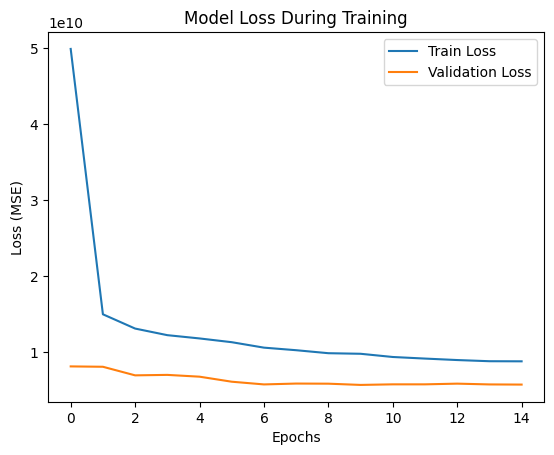

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU, PReLU

# Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Define features and target for the model
features = ['solar', 'renewables', 'imports', 'temp', 'hour', 'month', 'humidity', 'wind']
target = 'load'

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

# Reshape the input data to fit LSTM requirements (samples, timesteps, features)
X_train_scaled = np.expand_dims(X_train, axis=1)
X_test_scaled = np.expand_dims(X_test, axis=1)

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to optimize
    n_units_1 = trial.suggest_int('n_units_1', 32, 64)
    n_units_2 = trial.suggest_int('n_units_2', 16, 32)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-3)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])

    # Build the model
    model = Sequential()
    model.add(LSTM(n_units_1, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(n_units_2, activation='relu', return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate) if optimizer_name == 'Adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Train the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])

    # Evaluate the model
    val_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return val_loss[0]

# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print the best parameters
print("Best Parameters for LSTM Model:", study.best_params)

# Train the final model with the best parameters
best_params = study.best_params

final_model = Sequential()
final_model.add(LSTM(best_params['n_units_1'], activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(LSTM(best_params['n_units_2'], activation='relu', return_sequences=False))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1))

optimizer = Adam(learning_rate=best_params['learning_rate']) if best_params['optimizer'] == 'Adam' else RMSprop(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)
# Define early stopping again before using it for the final model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the final model with early stopping and learning rate scheduler
history = final_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping, lr_scheduler])

# Evaluate the final model
y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the results
print("LSTM Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("\nLSTM Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

# Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()


The LSTM model shows limited performance with low R² scores (Training: 0.17, Test: 0.19) and high MAE (~55,000). While training and validation losses stabilize, the model struggles to capture data variability.

###GRU

[I 2024-12-06 14:03:21,578] A new study created in memory with name: no-name-8b543cb6-9c13-4f64-9773-f80eeeacc33e
[I 2024-12-06 14:04:58,949] Trial 0 finished with value: 3448719104.0 and parameters: {'n_units_1': 45, 'n_units_2': 21, 'dropout_rate': 0.2013969556164476, 'learning_rate': 0.0005260749752773944, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 3448719104.0.
[I 2024-12-06 14:06:52,942] Trial 1 finished with value: 5067578368.0 and parameters: {'n_units_1': 57, 'n_units_2': 31, 'dropout_rate': 0.20295321476373337, 'learning_rate': 0.00014578418547545865, 'optimizer': 'RMSprop'}. Best is trial 0 with value: 3448719104.0.
[I 2024-12-06 14:07:46,963] Trial 2 finished with value: 6657777152.0 and parameters: {'n_units_1': 34, 'n_units_2': 27, 'dropout_rate': 0.25634792290197295, 'learning_rate': 0.00012107747953650891, 'optimizer': 'Adam'}. Best is trial 0 with value: 3448719104.0.
[I 2024-12-06 14:09:20,758] Trial 3 finished with value: 2736591360.0 and parameters: {'n_uni

Best Parameters for GRU Model: {'n_units_1': 52, 'n_units_2': 26, 'dropout_rate': 0.12260486932476695, 'learning_rate': 0.000930246836360411, 'optimizer': 'RMSprop'}
Epoch 1/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 40160411648.0000 - mae: 161931.2812 - val_loss: 6418717696.0000 - val_mae: 58914.4648 - learning_rate: 9.3025e-04
Epoch 2/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 8918330368.0000 - mae: 72820.1250 - val_loss: 5537808896.0000 - val_mae: 56048.2891 - learning_rate: 9.3025e-04
Epoch 3/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 8360876032.0000 - mae: 70121.7656 - val_loss: 5139760128.0000 - val_mae: 54381.9609 - learning_rate: 9.3025e-04
Epoch 4/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 7521121280.0000 - mae: 66397.8672 - val_loss: 4633837056.0000 - val_mae: 52482.4922 - learning_rate: 9.3025e-04
Epoch 5/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 7199455744.0000 - mae: 64705.7812 - val_loss: 4156059904.0000 - val_mae: 

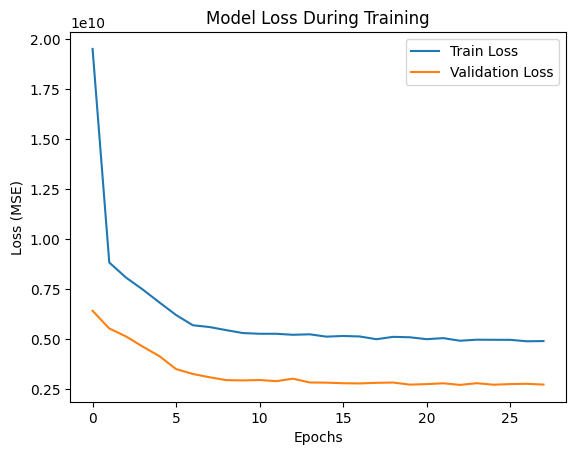

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GRU
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU, PReLU

# Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

# Reshape the input data to fit GRU requirements (samples, timesteps, features)
X_train_scaled = np.expand_dims(X_train, axis=1)
X_test_scaled = np.expand_dims(X_test, axis=1)

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to optimize
    n_units_1 = trial.suggest_int('n_units_1', 32, 64)
    n_units_2 = trial.suggest_int('n_units_2', 16, 32)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-3)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])

    # Build the model
    model = Sequential()
    model.add(GRU(n_units_1, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(GRU(n_units_2, activation='relu', return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate) if optimizer_name == 'Adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Train the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])

    # Evaluate the model
    val_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return val_loss[0]

# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print the best parameters
print("Best Parameters for GRU Model:", study.best_params)

# Train the final model with the best parameters
best_params = study.best_params

final_model = Sequential()
final_model.add(GRU(best_params['n_units_1'], activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(GRU(best_params['n_units_2'], activation='relu', return_sequences=False))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1))

optimizer = Adam(learning_rate=best_params['learning_rate']) if best_params['optimizer'] == 'Adam' else RMSprop(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)
# Define early stopping again before using it for the final model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the final model with early stopping and learning rate scheduler
history = final_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping, lr_scheduler])

# Evaluate the final model
y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the results
print("GRU Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("\nGRU Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

# Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()



- **Training Data**: MSE = 3.01B, R² = 0.582, MAE = 39,003
- **Test Data**: MSE = 2.72B, R² = 0.614, MAE = 38,169
- **Best Parameters**:
  - GRU Layers: 52 and 26 units
  - Dropout: 12.26%, Learning Rate: 0.00093, Optimizer: RMSprop
- **Observations**: Good generalization with a 61.4% variance explained. Further tuning or feature engineering could improve performance.

##REsearch question 2

In [ ]:
data_final['combined_renewables'] = data_final['solar'] + data_final['renewables'] + data_final['wind']


In [ ]:
features = ['temp', 'humidity', 'windspeed', 'solarenergy', 'cloudcover', 'large hydro', 'imports','hour','month']
target = 'combined_renewables'

X = data_final[features]
y = data_final[target]

###LSTM

[I 2024-12-06 14:23:03,677] A new study created in memory with name: no-name-32c21f28-c017-40a7-9b95-aa658ffed62e
[I 2024-12-06 14:23:30,893] Trial 0 finished with value: 63468974080.0 and parameters: {'n_units_1': 64, 'n_units_2': 20, 'dropout_rate': 0.2842797535256371, 'learning_rate': 0.00022749536682155455, 'optimizer': 'Adam'}. Best is trial 0 with value: 63468974080.0.
[I 2024-12-06 14:23:59,454] Trial 1 finished with value: 65100247040.0 and parameters: {'n_units_1': 32, 'n_units_2': 31, 'dropout_rate': 0.23820547393831337, 'learning_rate': 0.00019057454752518155, 'optimizer': 'Adam'}. Best is trial 0 with value: 63468974080.0.
[I 2024-12-06 14:24:27,215] Trial 2 finished with value: 62134792192.0 and parameters: {'n_units_1': 63, 'n_units_2': 19, 'dropout_rate': 0.24897129746590543, 'learning_rate': 0.0003857444342825352, 'optimizer': 'RMSprop'}. Best is trial 2 with value: 62134792192.0.


Best Parameters for LSTM Model: {'n_units_1': 63, 'n_units_2': 19, 'dropout_rate': 0.24897129746590543, 'learning_rate': 0.0003857444342825352, 'optimizer': 'RMSprop'}
Epoch 1/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 66226274304.0000 - mae: 193979.1719 - val_loss: 66912055296.0000 - val_mae: 195011.2031 - learning_rate: 3.8574e-04
Epoch 2/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 67384389632.0000 - mae: 195774.8438 - val_loss: 66621108224.0000 - val_mae: 194579.0469 - learning_rate: 3.8574e-04
Epoch 3/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 66853978112.0000 - mae: 195371.5156 - val_loss: 65854885888.0000 - val_mae: 193426.5312 - learning_rate: 3.8574e-04
Epoch 4/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 66174455808.0000 - mae: 194853.1875 - val_loss: 64579489792.0000 - val_mae: 191483.0781 - learning_rate: 3.4904e-04
Epoch 5/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 66238717952.0000 - mae: 193975.3281 - val_loss: 6283073945

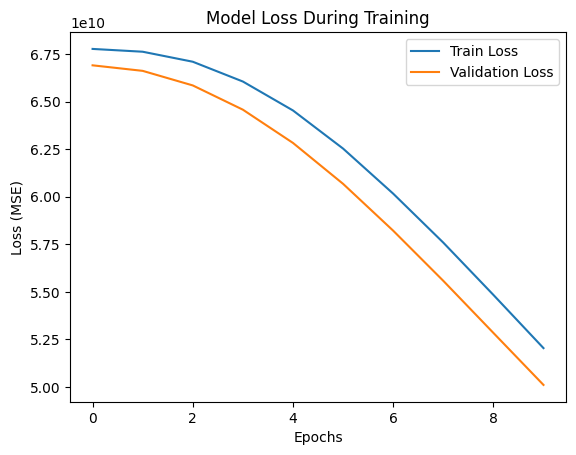

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU, PReLU

# Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data to fit LSTM requirements (samples, timesteps, features)
X_train_scaled = np.expand_dims(X_train_scaled, axis=1)
X_test_scaled = np.expand_dims(X_test_scaled, axis=1)

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to optimize
    n_units_1 = trial.suggest_int('n_units_1', 32, 64)
    n_units_2 = trial.suggest_int('n_units_2', 16, 32)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-3)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])

    # Build the model
    model = Sequential()
    model.add(LSTM(n_units_1, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(n_units_2, activation='relu', return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate) if optimizer_name == 'Adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Train the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=5, batch_size=32, verbose=0, callbacks=[early_stopping])

    # Evaluate the model
    val_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return val_loss[0]

# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=3)

# Print the best parameters
print("Best Parameters for LSTM Model:", study.best_params)

# Train the final model with the best parameters
best_params = study.best_params

final_model = Sequential()
final_model.add(LSTM(best_params['n_units_1'], activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(LSTM(best_params['n_units_2'], activation='relu', return_sequences=False))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1))

optimizer = Adam(learning_rate=best_params['learning_rate']) if best_params['optimizer'] == 'Adam' else RMSprop(learning_rate=best_params['learning_rate'])
final_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)
# Define early stopping again before using it for the final model
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the final model with early stopping and learning rate scheduler
history = final_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32, verbose=1, callbacks=[early_stopping, lr_scheduler])

# Evaluate the final model
y_train_pred = final_model.predict(X_train_scaled)
y_test_pred = final_model.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the results
print("LSTM Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("\nLSTM Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

# Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()




Training MSE: 50.56B, Test MSE: 50.10B
R²: -0.736 (training), -0.734 (test) – worse than a mean prediction
MAE: ~167,000 (training), ~167,000 (test)
Insights:

Model fails to capture data variance; high errors and poor fit.
Validation loss decreases but doesn't translate to better predictions.

##Research question 3

###DNN

In [ ]:
data_final['total_curtailment'] = data_final['solar curtailment'] + data_final['wind curtailment']


[I 2024-12-06 14:26:40,119] A new study created in memory with name: no-name-5caaf9cc-7253-4960-bece-8d6e998f7f06
[I 2024-12-06 14:27:08,851] Trial 0 finished with value: 52265912.0 and parameters: {'n_layers': 1, 'n_units': 123, 'dropout_rate': 0.4968527182470016, 'learning_rate': 0.0032961186510757946}. Best is trial 0 with value: 52265912.0.
[I 2024-12-06 14:27:38,678] Trial 1 finished with value: 96556576.0 and parameters: {'n_layers': 3, 'n_units': 33, 'dropout_rate': 0.4303785327866603, 'learning_rate': 2.8373145088519464e-05}. Best is trial 0 with value: 52265912.0.
[I 2024-12-06 14:28:09,031] Trial 2 finished with value: 58497508.0 and parameters: {'n_layers': 1, 'n_units': 26, 'dropout_rate': 0.19025686049573753, 'learning_rate': 0.0013244977283044844}. Best is trial 0 with value: 52265912.0.
[I 2024-12-06 14:28:40,407] Trial 3 finished with value: 50839536.0 and parameters: {'n_layers': 2, 'n_units': 70, 'dropout_rate': 0.3355026556481431, 'learning_rate': 0.00092299644156809

Best Parameters from Optuna: {'n_layers': 3, 'n_units': 125, 'dropout_rate': 0.37404815173087475, 'learning_rate': 0.0040905609297974925}
Epoch 1/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 59277152.0000 - mae: 3003.5769 - val_loss: 46465620.0000 - val_mae: 2525.1680
Epoch 2/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 48309724.0000 - mae: 2660.7112 - val_loss: 40899600.0000 - val_mae: 2261.4651
Epoch 3/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 43287364.0000 - mae: 2559.9529 - val_loss: 37515472.0000 - val_mae: 2274.9148
Epoch 4/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 38807692.0000 - mae: 2358.1802 - val_loss: 36155496.0000 - val_mae: 2177.3997
Epoch 5/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 38498468.0000 - mae: 2336.9434 - val_loss: 34193932.0000 - val_mae: 2128.5090
Epoch 6/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 36004256.0000 - mae: 2246.4668 - val_loss: 33811796.0000 - val_mae: 2122.6394
Epoch 7/50
1041/1041 

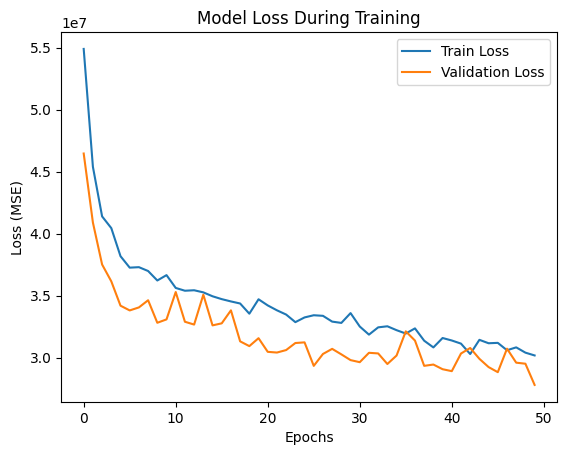

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import optuna

# Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Define features and target for the model
features = ['temp', 'humidity', 'windspeed', 'solarenergy', 'combined_renewables', 'thermal', 'large hydro', 'imports', 'load', 'nuclear']
target = 'total_curtailment'

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the objective function for Optuna

def objective(trial):
    # Hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 16, 128)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Build the DNN model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
    for _ in range(n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    val_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return val_loss[0]

# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Print the best parameters
print("Best Parameters from Optuna:", study.best_params)

# Train the final model with the best parameters
best_params = study.best_params

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
for _ in range(best_params['n_layers']):
    model.add(tf.keras.layers.Dense(best_params['n_units'], activation='relu'))
    model.add(tf.keras.layers.Dropout(best_params['dropout_rate']))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the results
print("DNN Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("\nDNN Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

# Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()


Best Parameters: 3 layers, 125 units, 0.37 dropout, 0.0041 learning rate.
Performance:
Train: MSE 25.6M, R² 0.717, MAE 1,906.
Test: MSE 27.8M, R² 0.683, MAE 1,967.
Insight: Good generalization with slight overfitting.

DNN tuning

[I 2024-12-06 14:43:18,174] A new study created in memory with name: no-name-7fca5067-d2f3-48fb-85e4-7a14d567e631
[I 2024-12-06 14:43:43,347] Trial 0 finished with value: 65476748.0 and parameters: {'n_layers': 1, 'n_units': 126, 'dropout_rate': 0.1271191834541507, 'learning_rate': 0.00038760252005195643, 'l2_regularization': 0.0007583216685830926}. Best is trial 0 with value: 65476748.0.
[I 2024-12-06 14:44:10,915] Trial 1 finished with value: 85778128.0 and parameters: {'n_layers': 1, 'n_units': 58, 'dropout_rate': 0.22770702222067465, 'learning_rate': 0.00026176458510183, 'l2_regularization': 0.009914388544780375}. Best is trial 0 with value: 65476748.0.
[I 2024-12-06 14:44:43,192] Trial 2 finished with value: 54888880.0 and parameters: {'n_layers': 2, 'n_units': 74, 'dropout_rate': 0.18750657307707616, 'learning_rate': 0.00021706482489141081, 'l2_regularization': 6.911460348964814e-05}. Best is trial 2 with value: 54888880.0.
[I 2024-12-06 14:45:30,466] Trial 3 finished with value:

Best Parameters from Optuna: {'n_layers': 3, 'n_units': 93, 'dropout_rate': 0.3307201957378283, 'learning_rate': 0.007151816040829181, 'l2_regularization': 0.00018542204682695326}
Epoch 1/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 63415124.0000 - mae: 3004.0051 - val_loss: 44764404.0000 - val_mae: 2428.4695
Epoch 2/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 43954100.0000 - mae: 2523.8933 - val_loss: 40662696.0000 - val_mae: 2147.4973
Epoch 3/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 39688252.0000 - mae: 2349.5725 - val_loss: 36106476.0000 - val_mae: 2276.3857
Epoch 4/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 41554084.0000 - mae: 2434.6047 - val_loss: 34856184.0000 - val_mae: 2169.3149
Epoch 5/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 38346296.0000 - mae: 2324.8352 - val_loss: 35767328.0000 - val_mae: 2221.6877
Epoch 6/50
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 36757968.0000 - mae: 2303.3879 - val_loss: 34120168.0000 -

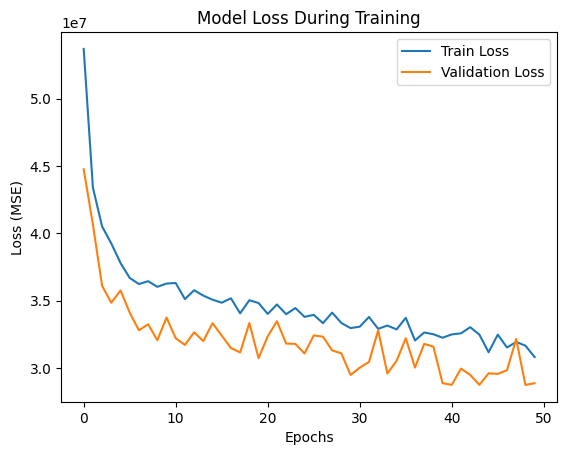

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import optuna

# Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Define features and target for the model
features = ['temp', 'humidity', 'windspeed', 'solarenergy', 'combined_renewables', 'thermal', 'large hydro', 'imports', 'load', 'nuclear']
target = 'total_curtailment'

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the objective function for Optuna

def objective(trial):
    # Hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 16, 128)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    l2_regularization = trial.suggest_loguniform('l2_regularization', 1e-5, 1e-2)

    # Build the DNN model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
    for _ in range(n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation='relu',
                                        kernel_regularizer=tf.keras.regularizers.l2(l2_regularization)))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    val_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return val_loss[0]

# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Print the best parameters
print("Best Parameters from Optuna:", study.best_params)

# Train the final model with the best parameters
best_params = study.best_params

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
for _ in range(best_params['n_layers']):
    model.add(tf.keras.layers.Dense(best_params['n_units'], activation='relu',
                                    kernel_regularizer=tf.keras.regularizers.l2(best_params['l2_regularization'])))
    model.add(tf.keras.layers.Dropout(best_params['dropout_rate']))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the results
print("DNN Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("\nDNN Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

# Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()


The hyperparameters of a **Deep Neural Network (DNN)** for predicting `total_curtailment` were optimized in this code using **Optuna**. We separated the data into training and testing sets, scaled the data, and created the feature set. Optuna was used to adjust the model's parameters (learning rate, L2 regularization) and architecture (number of layers, units, dropout rate). Ultimately, the model was trained using the optimal configuration, and its performance was assessed on both training and test sets. We decreased the number of optimization trials, raised the batch size, and decreased the number of epochs in order to shorten the execution time.

###LSTM (RNN)

[I 2024-12-06 15:04:45,216] A new study created in memory with name: no-name-41d02e38-007a-40f7-b210-7ad1cc69e5b8
[I 2024-12-06 15:06:14,883] Trial 0 finished with value: 3178.82177734375 and parameters: {'n_layers': 2, 'n_units': 80, 'dropout_rate': 0.2104095722896867, 'learning_rate': 0.00017931431000282744, 'l2_regularization': 4.0734395024090756e-05}. Best is trial 0 with value: 3178.82177734375.
[I 2024-12-06 15:07:11,751] Trial 1 finished with value: 3162.958740234375 and parameters: {'n_layers': 1, 'n_units': 87, 'dropout_rate': 0.22282833780378802, 'learning_rate': 0.0002503639251005887, 'l2_regularization': 0.00014994207273074064}. Best is trial 1 with value: 3162.958740234375.
[I 2024-12-06 15:08:09,671] Trial 2 finished with value: 3184.50439453125 and parameters: {'n_layers': 1, 'n_units': 96, 'dropout_rate': 0.2277415461535471, 'learning_rate': 0.0001320696461150275, 'l2_regularization': 0.0006760970399939799}. Best is trial 1 with value: 3162.958740234375.
[I 2024-12-06 1

Best Parameters from Optuna: {'n_layers': 1, 'n_units': 87, 'dropout_rate': 0.22282833780378802, 'learning_rate': 0.0002503639251005887, 'l2_regularization': 0.00014994207273074064}
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Model - Training Data Evaluation:
Mean Squared Error (MSE): 98551097.40738791
R² Score: -0.08695392165929583
Mean Absolute Error (MAE): 3123.0355372020394

LSTM Model - Test Data Evaluation:
Mean Squared Error (MSE): 95393990.54918641
R² Score: -0.08659021351281271
Mean Absolute Error (MAE): 3073.858372932379


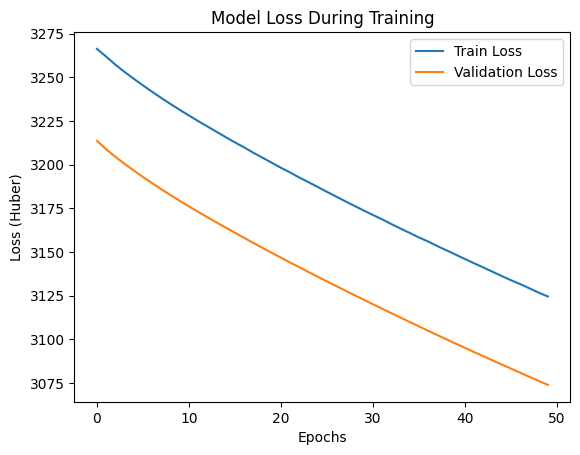

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import optuna

# Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Define features and target for the model
features = ['temp', 'humidity', 'windspeed', 'solarenergy', 'combined_renewables', 'thermal', 'large hydro', 'imports', 'load', 'nuclear']
target = 'total_curtailment'

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 32, 128)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-3)
    l2_regularization = trial.suggest_loguniform('l2_regularization', 1e-5, 1e-3)

    # Build the LSTM model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
    for _ in range(n_layers):
        model.add(tf.keras.layers.LSTM(n_units, activation='tanh', return_sequences=True if _ < n_layers - 1 else False,
                                       kernel_regularizer=tf.keras.regularizers.l2(l2_regularization)))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.Huber(), metrics=['mae'])

    # Train the model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30, batch_size=128,
                        verbose=0, callbacks=[early_stopping])

    # Evaluate the model
    val_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return val_loss[0]

# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# Print the best parameters
print("Best Parameters from Optuna:", study.best_params)

# Train the final model with the best parameters
best_params = study.best_params

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
for _ in range(best_params['n_layers']):
    model.add(tf.keras.layers.LSTM(best_params['n_units'], activation='tanh', return_sequences=True if _ < best_params['n_layers'] - 1 else False,
                                   kernel_regularizer=tf.keras.regularizers.l2(best_params['l2_regularization'])))
    model.add(tf.keras.layers.Dropout(best_params['dropout_rate']))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']), loss=tf.keras.losses.Huber(), metrics=['mae'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=64,
                    verbose=0, callbacks=[early_stopping])

# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Display the results
print("LSTM Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("\nLSTM Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

# Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Huber)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()


The LSTM model performed poorly with high error metrics (MSE: 95,394,990, MAE: 3,073.86) and a negative R² (-0.086), indicating it failed to capture the variance in the data.

#### **modifying the lstm model**

[I 2024-12-06 15:33:32,313] A new study created in memory with name: no-name-9b650b5a-fbf1-41d6-9e08-cd96c08c6614
[I 2024-12-06 15:37:53,738] Trial 0 finished with value: 3217.382568359375 and parameters: {'n_layers': 4, 'n_units': 154, 'dropout_rate': 0.16372287656380446, 'learning_rate': 4.2768173943846666e-05, 'l2_regularization': 2.37306016631275e-05}. Best is trial 0 with value: 3217.382568359375.
[I 2024-12-06 15:40:36,183] Trial 1 finished with value: 3217.43896484375 and parameters: {'n_layers': 3, 'n_units': 65, 'dropout_rate': 0.17782783296642254, 'learning_rate': 3.726926945004894e-05, 'l2_regularization': 0.0007184028182902336}. Best is trial 0 with value: 3217.382568359375.
[I 2024-12-06 15:43:44,030] Trial 2 finished with value: 3217.41259765625 and parameters: {'n_layers': 3, 'n_units': 163, 'dropout_rate': 0.10233766387836017, 'learning_rate': 3.781461691425095e-05, 'l2_regularization': 0.00012189687289956964}. Best is trial 0 with value: 3217.382568359375.
[I 2024-12-0

Best Parameters from Optuna: {'n_layers': 4, 'n_units': 154, 'dropout_rate': 0.16372287656380446, 'learning_rate': 4.2768173943846666e-05, 'l2_regularization': 2.37306016631275e-05}
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
LSTM Model - Training Data Evaluation:
Mean Squared Error (MSE): 101292924.68312526
R² Score: -0.11710133521316135
Mean Absolute Error (MAE): 3267.513072879641

LSTM Model - Test Data Evaluation:
Mean Squared Error (MSE): 98116601.60048546
R² Score: -0.11724706475559299
Mean Absolute Error (MAE): 3217.867590321361


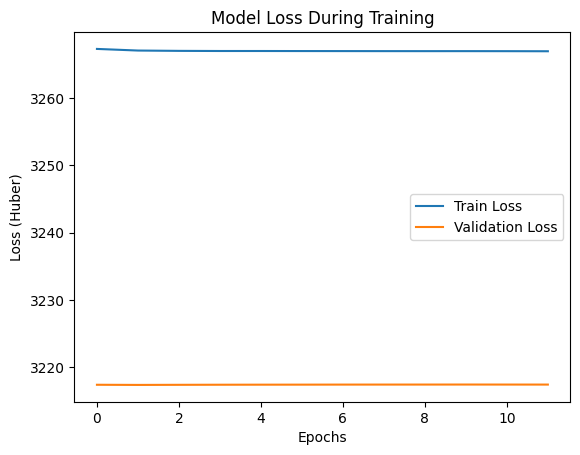

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import optuna

#Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Define features and target for the model
features = ['temp', 'humidity', 'windgust', 'windspeed', 'solarradiation',
            'generation', 'combined_renewables', 'thermal', 'large hydro', 'imports', 'load',
            'hour', 'day', 'month']
target = 'total_curtailment'

#Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

#Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (samples, timesteps, features)
timesteps = 3
X_train_scaled = np.array([X_train_scaled[i:i+timesteps] for i in range(len(X_train_scaled) - timesteps)])
y_train = y_train.iloc[timesteps:]
X_test_scaled = np.array([X_test_scaled[i:i+timesteps] for i in range(len(X_test_scaled) - timesteps)])
y_test = y_test.iloc[timesteps:]


# Define the objective function for Optuna
def objective(trial):
    #Hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 4)
    n_units = trial.suggest_int('n_units', 32, 256)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-4)
    l2_regularization = trial.suggest_loguniform('l2_regularization', 1e-5, 1e-3)

    #Build the LSTM model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(timesteps, X_train_scaled.shape[2])))
    for _ in range(n_layers):
        model.add(tf.keras.layers.LSTM(n_units, activation='tanh', return_sequences=True if _ < n_layers - 1 else False,
                                       kernel_regularizer=tf.keras.regularizers.l2(l2_regularization)))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1))

    #Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.Huber(), metrics=['mae'])

    #Train the model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30, batch_size=128,
                        verbose=0, callbacks=[early_stopping])

    #Evaluate the model
    val_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return val_loss[0]

#Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

#Print the best parameters
print("Best Parameters from Optuna:", study.best_params)

#Train the final model with the best parameters
best_params = study.best_params

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
for _ in range(best_params['n_layers']):
    model.add(tf.keras.layers.LSTM(best_params['n_units'], activation='tanh', return_sequences=True if _ < best_params['n_layers'] - 1 else False,
                                   kernel_regularizer=tf.keras.regularizers.l2(best_params['l2_regularization'])))
    model.add(tf.keras.layers.Dropout(best_params['dropout_rate']))
model.add(tf.keras.layers.Dense(1))

#Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']), loss=tf.keras.losses.Huber(), metrics=['mae'])

#Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=64,
                    verbose=0, callbacks=[early_stopping])

#Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

#Display the results
print("LSTM Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("\nLSTM Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

#Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Huber)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()


The LSTM model shows underperformance, with high MSE (98,116,601) and negative R² (-0.117), indicating it cannot explain the variance in the data.

###GRU

[I 2024-12-06 16:01:40,093] A new study created in memory with name: no-name-b9fe7dcc-e28e-47bc-9e20-9e0bb216eae3
[I 2024-12-06 16:04:50,229] Trial 0 finished with value: 3217.39208984375 and parameters: {'n_layers': 2, 'n_units': 151, 'dropout_rate': 0.2585829803800732, 'learning_rate': 1.2837864853601897e-05, 'l2_regularization': 3.419147369459768e-05}. Best is trial 0 with value: 3217.39208984375.
[I 2024-12-06 16:06:12,495] Trial 1 finished with value: 3217.448974609375 and parameters: {'n_layers': 2, 'n_units': 176, 'dropout_rate': 0.2103464397562258, 'learning_rate': 7.900777821967475e-05, 'l2_regularization': 0.00040866137566280674}. Best is trial 0 with value: 3217.39208984375.
[I 2024-12-06 16:08:43,776] Trial 2 finished with value: 3217.371826171875 and parameters: {'n_layers': 3, 'n_units': 66, 'dropout_rate': 0.28908305251360544, 'learning_rate': 1.735977327895804e-05, 'l2_regularization': 1.4141038806880348e-05}. Best is trial 2 with value: 3217.371826171875.


Best Parameters from Optuna: {'n_layers': 3, 'n_units': 66, 'dropout_rate': 0.28908305251360544, 'learning_rate': 1.735977327895804e-05, 'l2_regularization': 1.4141038806880348e-05}
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
GRU Model - Training Data Evaluation:
Mean Squared Error (MSE): 101301600.78971991
R² Score: -0.1171970189965219
Mean Absolute Error (MAE): 3267.534007056893
GRU Model - Test Data Evaluation:
Mean Squared Error (MSE): 98124844.47137675
R² Score: -0.11734092576543453
Mean Absolute Error (MAE): 3217.858568295356


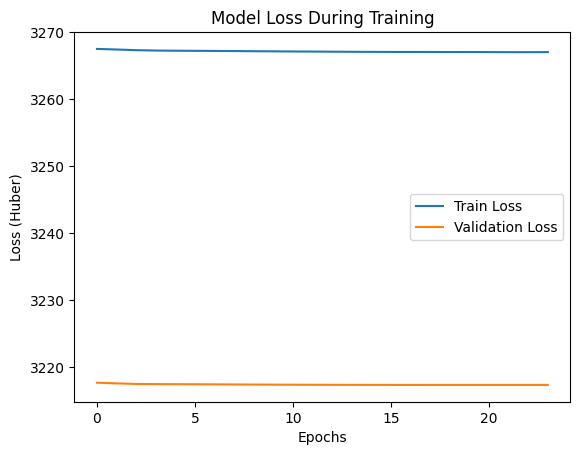

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import optuna

#Load the dataset and preprocess
def preprocess_data(data, features, target):
    data = data[features + [target]].dropna()
    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Define features and target for the model
features = ['temp', 'humidity', 'windgust', 'windspeed', 'solarradiation',
            'generation', 'combined_renewables', 'thermal', 'large hydro', 'imports', 'load',
            'hour', 'day', 'month']
target = 'total_curtailment'

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(data_final, features, target)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (samples, timesteps, features)
timesteps = 3
X_train_scaled = np.array([X_train_scaled[i:i+timesteps] for i in range(len(X_train_scaled) - timesteps)])
y_train = y_train.iloc[timesteps:]
X_test_scaled = np.array([X_test_scaled[i:i+timesteps] for i in range(len(X_test_scaled) - timesteps)])
y_test = y_test.iloc[timesteps:]


# Define the objective function for Optuna
def objective(trial):
    #Hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 4)
    n_units = trial.suggest_int('n_units', 32, 256)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-4)
    l2_regularization = trial.suggest_loguniform('l2_regularization', 1e-5, 1e-3)

    # Build the LSTM model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(timesteps, X_train_scaled.shape[2])))
    for _ in range(n_layers):
        model.add(tf.keras.layers.GRU(n_units, activation='tanh', return_sequences=True if _ < n_layers - 1 else False,
                                       kernel_regularizer=tf.keras.regularizers.l2(l2_regularization)))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.Huber(), metrics=['mae'])

    # Train the model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=256,
                        verbose=0, callbacks=[early_stopping])

    # Evaluate the model
    val_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return val_loss[0]

#  Run Optuna to find the best hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=3)

# Print the best parameters
print("Best Parameters from Optuna:", study.best_params)

#  Train the final model with the best parameters
best_params = study.best_params

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
for _ in range(best_params['n_layers']):
    model.add(tf.keras.layers.GRU(best_params['n_units'], activation='tanh', return_sequences=True if _ < best_params['n_layers'] - 1 else False,
                                   kernel_regularizer=tf.keras.regularizers.l2(best_params['l2_regularization'])))
    model.add(tf.keras.layers.Dropout(best_params['dropout_rate']))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']), loss=tf.keras.losses.Huber(), metrics=['mae'])

# Train the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30, batch_size=128,
                    verbose=0, callbacks=[early_stopping])

# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

#Calculate performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

#Display the results
print("GRU Model - Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Error (MAE): {train_mae}")

print("GRU Model - Test Data Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {test_mae}")

# Optional: Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Huber)')
plt.title('Model Loss During Training')
plt.legend()
plt.show()



The GRU model's performance remains poor, with high MSE (98,124,844) and a negative R² (-0.117), indicating it fails to explain the variance in the data effectively.